In [8]:
from onset_functions import *
import datetime as dt
from inf_inj_time import *
from math import sqrt

In [9]:
event_date = 20210715

#Path for the downloaded data
path = '/home/smurf/solo/data/'
#Path to save plots
file_path = f'/home/smurf/serpentine/eventlist/{event_date}/'
#Path for plot of highest peak flux and earliest onset time
#file_path_max = f'/home/smurf/serpentine/eventlist/{event_date}/max_{event_date}/'

#Plot time range
sdate = datetime.date(2021, 7, 15)
edate = datetime.date(2021, 7, 17)
plot_range = [dt.datetime(2021, 7, 15, 0),dt.datetime(2021, 7, 17, 0)]

In [10]:
#Get event data
event_onset = Event(spacecraft='soho', sensor='erne', data_level='l2', species = 'p', start_date=sdate, end_date=edate, data_path=path)

In [11]:
#Particle type for filename
particle_type = 'ERNE-HED_p'
particle_ch = [3, 4]
#Add particle specific folder to file path
file_path = file_path + particle_type + '_' + str(event_date) + '/'

In [12]:
file_path

'/home/smurf/serpentine/eventlist/20210715/ERNE-HED_p_20210715/'

# Event plots

In [13]:
#Determine resample period (e.g. 10min, 30S)

averaging = '10min'

In [14]:
# Determine and adjust background start and length (e.g. 3, 8.1)

bg_start = 1
bg_length = 16

##### >Energy channels< #####
25.0 - 40.0 MeV
#############################

##### >Flux peak< #####
Epoch
2021-07-16 19:55:00    0.003721
Freq: 10T, dtype: float32
#######################

##### >Onset time< #####
2021-07-16 15:25:00
########################

##### >Mean of background intensity< #####
0.00025350504
##########################################

##### >Std of background intensity< #####
7.1471826e-05
#########################################

##### >Particle species< #####
protons
##############################



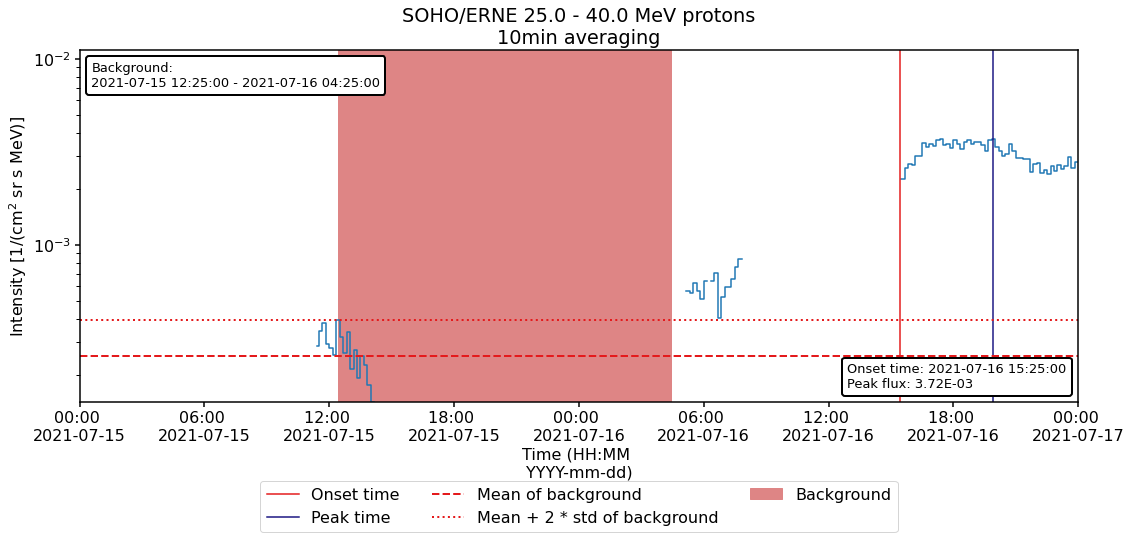

In [15]:
#Generate event plots for different viewing directions

flux, onset_stats, onset_found, peak_flux, peak_time, fig, bg_mean = event_onset.analyse(viewing='', bg_start=bg_start, bg_length=bg_length, channels=particle_ch,
                                                                                         resample_period=averaging, yscale='log', cusum_window=30, xlim=plot_range)
onset = onset_stats[-1]
peak_flux = peak_flux.values[0]

In [9]:
print(f"Onset: {onset}")
print(f"Peak flux: {peak_flux:.2E}")
print(f"Peak time: {peak_time}")
print(f"Bg mean: {bg_mean:.2E}")

Onset: 2021-07-16 15:25:00
Peak flux: 3.72E-03
Peak time: 2021-07-16 19:55:00
Bg mean: 2.54E-04


# Saving figures

In [277]:
#Create file name for maximum peak flux plot (if averaging is 10min)
filename_flux = f'{file_path}SOHO_{particle_type}_{event_date}_{averaging}.png'

In [278]:
#Check right filename
filename_flux

'/home/smurf/serpentine/eventlist/20210715/ERNE-HED_p_20210715/SOHO_ERNE-HED_p_20210715_10min.png'

In [280]:
#Save maximum peak flux plot
fig.savefig(filename_flux, facecolor= 'white', transparent=False)

# Inferred injection time

In [281]:
geom_mean = sqrt(25*40)

In [267]:
inj_time, distance = inf_inj_time('Soho', onset.to_pydatetime(), 'p', geom_mean, 400)

INFO: Obtained JPL HORIZONS location for SOHO (spacecraft) (-21) [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for Sun (10) [sunpy.coordinates.ephemeris]


In [268]:
print(pd.Timestamp(inj_time))
print(f"{distance:.2F}")

2021-07-13 21:56:30.509653
1.01 AU
